In [118]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import keras
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import sklearn

In [31]:
def Graph(x,y,title,x_label,y_label):
    fig,ax = plt.subplots() 

    ax.plot(x,y, marker = '|')
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    loc = plticker.MultipleLocator(base=9) # this locator puts ticks at regular intervals
    ax.xaxis.set_major_locator(loc)

    plt.show()

In [35]:
df = pd.read_csv('/Users/alextaylor/Desktop/Covid_dataset/covid-variants.csv')

#Dataset can be found here - https://www.kaggle.com/yamqwe/omicron-covid19-variant-daily-cases

df.head()


,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


In [103]:
df.variant.unique()

array(['Alpha', 'B.1.1.277', 'B.1.1.302', 'B.1.1.519', 'B.1.160',
       'B.1.177', 'B.1.221', 'B.1.258', 'B.1.367', 'B.1.620', 'Beta',
       'Delta', 'Epsilon', 'Eta', 'Gamma', 'Iota', 'Kappa', 'Lambda',
       'Mu', 'Omicron', 'S:677H.Robin1', 'S:677P.Pelican', 'others',
       'non_who'], dtype=object)

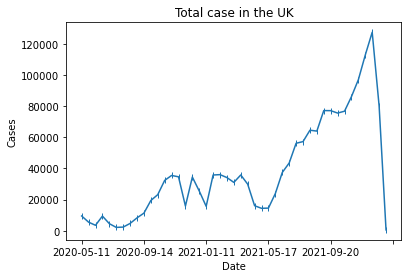

In [33]:
# Lets see the graph for all covid cases in the UK 

uk_df = df.loc[df['location'] == 'United Kingdom']

for_uk_graph = {}



count = 0
for index, row in uk_df.iterrows():
    
    count = row.num_sequences
    
    if row.date in for_uk_graph.keys():
        count = for_uk_graph[row.date] + count
        
        for_uk_graph[row.date] = count
    else:
        for_uk_graph[row.date] = count
    
x = list(for_uk_graph.keys())
y = list(for_uk_graph.values())

Graph(x,y,'Total case in the UK','Date','Cases')

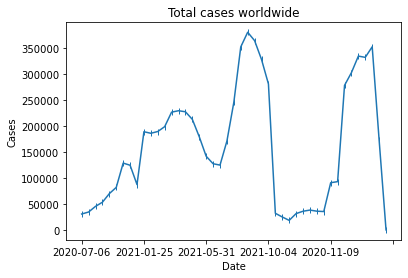

In [37]:
#And now for worldwide

for_graph = {}

#Using a dict as it will auto- update when appending 

count = 0
for index, row in df.iterrows():
    
    count = row.num_sequences
    
    if row.date in for_graph.keys():
        count = for_graph[row.date] + count
        
        for_graph[row.date] = count
    else:
        for_graph[row.date] = count


Graph(list(for_graph.keys()),list(for_graph.values()),'Total cases worldwide','Date','Cases' )

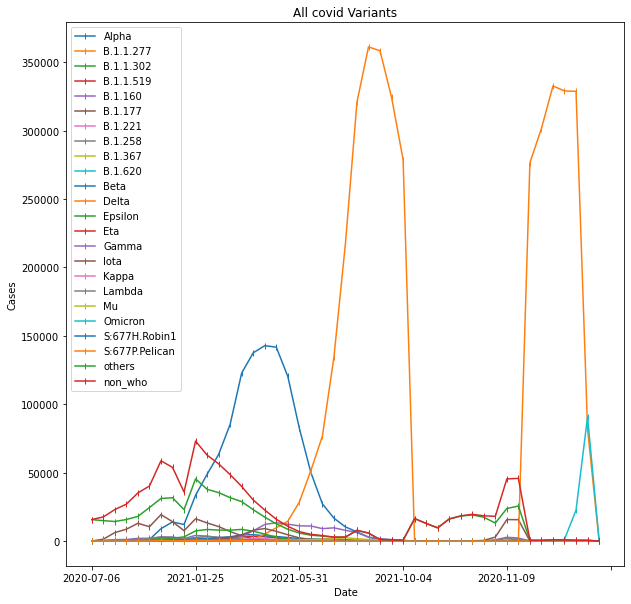

<Figure size 216x216 with 0 Axes>

In [105]:
#Now lets see all of the variants 
variants = df.variant.unique()

variant_dict = {}
variant_dict_count = dict.fromkeys(variants)

count = 0

for i in variants:
    #looping over each variant - i is the variant name - now pull out each and append it to a list 
    variant_dict[i] = df.loc[df['variant'] == i]
    variant_dict_count[i] = {}

#Add up all nums as before to get plotable totals 
for i in variant_dict:
    
    for index, row in variant_dict[i].iterrows():
   
        count = row.num_sequences

        if row.date in variant_dict_count[i].keys():
            count = variant_dict_count[i][row.date] + count

            variant_dict_count[i][row.date] = count
        else:
            variant_dict_count[i][row.date] = count
        
#plotting graph will have to be new code 
#plt.figure(figsize=(10, 10))
fig,ax = plt.subplots(figsize = (10,10)) 
#fig(figsize=(10,10))
ax.set_title('All covid Variants')
ax.set_xlabel('Date')
ax.set_ylabel('Cases')
loc = plticker.MultipleLocator(base=9) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

#plt.figure(figsize=(10, 10))
for i in variant_dict:
    
    x = list(variant_dict_count[i].keys())
    y = list(variant_dict_count[i].values())
    ax.plot(x,y,label = i,marker = '|')
    
    plt.legend(loc = 0)
plt.figure(figsize=(3, 3))
plt.show()

#Overall shows that the B.1.1.277 is the most common strain of Covid-19 an

In [115]:
# Prediction - Can a varient be identified by its individual graph 
# Realisticly could be used to id the dominant strain at any given time - 
# Prediction - Will not be very useful as it overlays with other variants, can only be reliably used when it has a single dominant variant

# Set up test and training sets
# Need to get them split by country 
#Now lets see all of the variants 
locs = df.location.unique()

location_dict = {}
var_loc = []

count = 0

for i in locs:
    #looping over each variant - i is the variant name - now pull out each and append it to a list 
    location_dict[i] = df.loc[df['location'] == i]
    #Now we have the data formatted by country - Take it from variant too - Pulling variants from prev work
    for j in variants:
        var_loc.append(location_dict[i].loc[df['variant'] == j])
    

#Now that it is formatted correctly - shuffle and split



In [124]:
var_loc = shuffle(var_loc)

#need to seperate results from 


x_train, x_test, y_train, y_test = train_test_split(x, y)





[      location        date  variant  num_sequences  perc_sequences  \
44312   Jordan  2020-06-08  B.1.367              0             0.0   
44336   Jordan  2020-06-22  B.1.367              0             0.0   
44360   Jordan  2020-07-06  B.1.367              0             0.0   
44384   Jordan  2020-08-17  B.1.367              0             0.0   
44408   Jordan  2020-08-31  B.1.367              0             0.0   
44432   Jordan  2020-09-14  B.1.367              0             0.0   
44456   Jordan  2020-09-28  B.1.367              0             0.0   
44480   Jordan  2020-10-12  B.1.367              0             0.0   
44504   Jordan  2020-10-26  B.1.367              0             0.0   
44528   Jordan  2020-11-09  B.1.367              0             0.0   
44552   Jordan  2020-12-07  B.1.367              0             0.0   
44576   Jordan  2020-12-21  B.1.367              0             0.0   
44600   Jordan  2021-01-04  B.1.367              0             0.0   
44624   Jordan  202